In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import cv2
np.random.seed(42)                      
from keras.models import Sequential             
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.optimizers import Adam, SGD

2024-06-06 16:07:01.689884: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-06 16:07:01.954139: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-06 16:07:01.954237: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-06 16:07:01.955760: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-06-06 16:07:02.072563: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-06 16:07:02.074764: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

In [3]:
PATH_TO_DATA = '../../images/ocr_combined/'
images = os.listdir(PATH_TO_DATA)
print(len(images))

20511


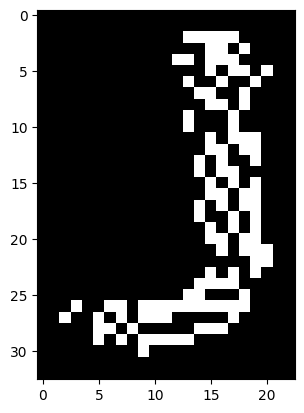

In [4]:
# Load images and labels into numpy arrays
X = []
y = []

for image in images:
    img = Image.open(PATH_TO_DATA + image)
    # convert to black and white
    img = img.convert('L')
    img = np.array(img) / 255
    # array to int
    img = img.astype(int)
    X.append(img)
    y.append(image[0])

X = np.array(X)
y = np.array(y)

X.shape, y.shape
plt.imshow(X[30], cmap='gray')

In [5]:
# Convert arrays to vectors
# X = X.reshape(X.shape[0], -1)
y = y.reshape(y.shape[0], -1)

X.shape, y.shape

((20511, 33, 23), (20511, 1))

In [6]:
# Convert labels to one-hot encoding
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
y = lb.fit_transform(y)

y.shape

(20511, 27)

In [7]:
import pickle
# Save the label encoder lb
with open('label_encoder.pkl', 'wb') as f:
    pickle.dump(lb, f)

In [8]:
num_classes = y.shape[1]
num_pixels = X.shape[1]

num_classes, num_pixels

(27, 33)

In [9]:
def baseline_model():
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(2, 2), input_shape=(33, 23, 1)))
    model.add(Activation('relu'))
    # model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(32, kernel_size=(2, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    # model.add(Conv2D(32, kernel_size=(2, 3), activation='relu'))
    # model.add(MaxPooling2D(pool_size=(2, 2)))
    # model.add(Dropout(0.25))



    # Softmax layer
    model.add(Flatten())
    model.add(Dense(num_classes, activation='softmax'))
    

    
    return model

# build the model
model = baseline_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 22, 32)        160       
                                                                 
 activation (Activation)     (None, 32, 22, 32)        0         
                                                                 
 dropout (Dropout)           (None, 32, 22, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 31, 20, 32)        6176      
                                                                 
 activation_1 (Activation)   (None, 31, 20, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 10, 32)        0         
 D)                                                              
                                                        

In [10]:
opt = Adam(lr = 0.001)
model.compile(loss='categorical_crossentropy', optimizer= opt, metrics=['accuracy'])

In [11]:
model.fit(X, y, epochs=10, batch_size=32, verbose=1)

2024-06-06 16:08:15.468581: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 124542792 exceeds 10% of free system memory.


Epoch 1/10
  3/641 [..............................] - ETA: 41s - loss: 3.2692 - accuracy: 0.0729     

2024-06-06 16:08:17.857739: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 26188800 exceeds 10% of free system memory.
2024-06-06 16:08:17.858231: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 26188800 exceeds 10% of free system memory.
2024-06-06 16:08:17.923234: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 26188800 exceeds 10% of free system memory.
2024-06-06 16:08:17.923347: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 26188800 exceeds 10% of free system memory.


641/641 [==============================] - 38s 56ms/step - loss: 0.0914 - accuracy: 0.9783
Epoch 2/10
641/641 [==============================] - 27s 42ms/step - loss: 0.0026 - accuracy: 0.9991
Epoch 3/10
641/641 [==============================] - 27s 43ms/step - loss: 0.0031 - accuracy: 0.9990
Epoch 4/10
641/641 [==============================] - 27s 43ms/step - loss: 0.0022 - accuracy: 0.9993
Epoch 5/10
641/641 [==============================] - 28s 44ms/step - loss: 1.0354e-04 - accuracy: 1.0000
Epoch 6/10
641/641 [==============================] - 28s 44ms/step - loss: 7.5927e-05 - accuracy: 1.0000
Epoch 7/10
641/641 [==============================] - 27s 43ms/step - loss: 0.0016 - accuracy: 0.9997
Epoch 8/10
641/641 [==============================] - 28s 43ms/step - loss: 0.0017 - accuracy: 0.9995
Epoch 9/10
641/641 [==============================] - 28s 43ms/step - loss: 0.0013 - accuracy: 0.9995
Epoch 10/10
641/641 [==============================] - 27s 43ms/step - loss: 0.0027 -

In [12]:
model.save('ocr_model.h5')

/home/mees/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


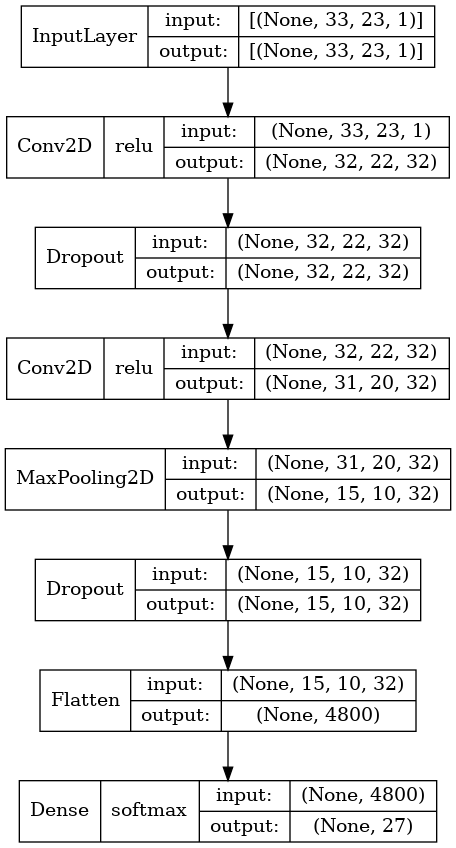

In [5]:
model = keras.models.load_model('../models/ocr_model.h5')
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=False, rankdir="TB",show_layer_activations=True)
